<a href="https://colab.research.google.com/github/aisudev/drug-classification/blob/main/ML_Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Classification

## Setup Kaggle & Dataset

### upload kaggle key

In [ ]:
from google.colab import files
kaggleKey = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

### Download dataset from kaggle

In [ ]:
!kaggle datasets download -d prathamtripathi/drug-classification

  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 3.31MB/s]


In [ ]:
!unzip ./drug-classification.zip

Archive:  ./drug-classification.zip
  inflating: drug200.csv             


## Manipulating

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('./drug200.csv')

# convert the columns name to lower case
data.columns = data.columns.str.lower()

data.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   na_to_k      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Convert the string columns to lowercase

In [ ]:
# Convert the values in the column to lowercase
def convert_column_val_to_lowercase(df, colName):
  return df[colName].apply(lambda x: str(x).lower())

# Convert all the columns type string to lowercase
strCols = ['sex', 'bp', 'cholesterol', 'drug']
for col in strCols:
  data[col] = convert_column_val_to_lowercase(data, col)

data.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drugy
1,47,m,low,high,13.093,drugc
2,47,m,low,high,10.114,drugc
3,28,f,normal,high,7.798,drugx
4,61,f,low,high,18.043,drugy


In [ ]:
# convert the column drug values by split the word to select the category name.
data['drug'] = data['drug'].apply(lambda x: x[-1])
data.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,y
1,47,m,low,high,13.093,c
2,47,m,low,high,10.114,c
3,28,f,normal,high,7.798,x
4,61,f,low,high,18.043,y


### Unique value in each columns

In [ ]:
unique_drugs = pd.unique(data['drug'])
unique_sex = pd.unique(data['sex'])
unique_bp = pd.unique(data['bp'])
unique_cholesterol = pd.unique(data['cholesterol'])

print(f"Drugs: {unique_drugs} \nSex: {unique_sex} \nBP: {unique_bp} \nCholesterol: {unique_cholesterol}")

Drugs: ['y' 'c' 'x' 'a' 'b'] 
Sex: ['f' 'm'] 
BP: ['high' 'low' 'normal'] 
Cholesterol: ['high' 'normal']


### Binary Encoding

In [ ]:
# Encoding Sex (Female:0, Male:1)
data['sex'] = data['sex'].apply(lambda x: 1 if str(x) == 'm' else 0)
# Encoding Cholesterol (Low:0, High:1)
data['cholesterol'] = data['cholesterol'].apply(lambda x: 1 if str(x) == 'high' else 0)

data.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,high,1,25.355,y
1,47,1,low,1,13.093,c
2,47,1,low,1,10.114,c
3,28,0,normal,1,7.798,x
4,61,0,low,1,18.043,y


### OneHot on BP

In [ ]:
data = data.join(pd.get_dummies(data['bp'], prefix='bp').drop(['bp_normal'], axis=1)).drop(['bp'], axis=1)
data.head()

,age,sex,cholesterol,na_to_k,drug,bp_high,bp_low
0,23,0,1,25.355,y,1,0
1,47,1,1,13.093,c,0,1
2,47,1,1,10.114,c,0,1
3,28,0,1,7.798,x,0,0
4,61,0,1,18.043,y,0,1


### check the imbalanced data set

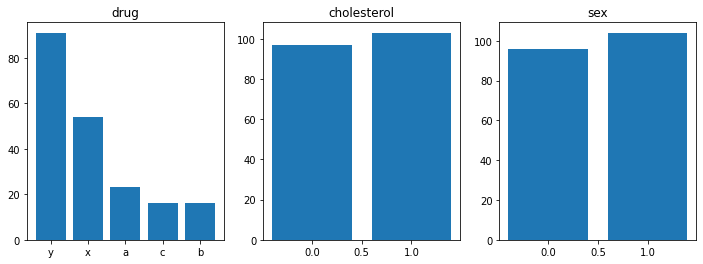

In [ ]:
barList = ['drug', 'cholesterol', 'sex']
_, axs = plt.subplots(1, 3, figsize=(12, 4))

i = 0
for row in axs:
    row.bar(data[barList[i]].value_counts().index, data[barList[i]].value_counts().values)
    row.set_title(barList[i])
    i += 1

### Split Feature and Target

In [ ]:
y = data.drug.to_numpy()
data.drop(['drug'], axis=1, inplace=True)
y[:5]

array(['y', 'c', 'c', 'x', 'y'], dtype=object)

In [ ]:
x = data.to_numpy()
x[:5]

array([[23.   ,  0.   ,  1.   , 25.355,  1.   ,  0.   ],
       [47.   ,  1.   ,  1.   , 13.093,  0.   ,  1.   ],
       [47.   ,  1.   ,  1.   , 10.114,  0.   ,  1.   ],
       [28.   ,  0.   ,  1.   ,  7.798,  0.   ,  0.   ],
       [61.   ,  0.   ,  1.   , 18.043,  0.   ,  1.   ]])

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, test_size=.3)
print(f"Train Shape: {x_train.shape}, {y_train.shape}\nTest Shape: {x_test.shape}, {y_test.shape}")

Train Shape: (140, 6), (140,)
Test Shape: (60, 6), (60,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

### Prediction

In [ ]:
y_pred = forest.predict(x_test)
y_test, y_pred

(array(['a', 'y', 'b', 'y', 'a', 'x', 'x', 'a', 'x', 'c', 'a', 'b', 'x',
        'x', 'y', 'c', 'a', 'y', 'c', 'x', 'x', 'b', 'x', 'y', 'y', 'y',
        'y', 'x', 'y', 'a', 'x', 'x', 'y', 'y', 'a', 'y', 'a', 'y', 'y',
        'y', 'y', 'x', 'x', 'y', 'y', 'y', 'b', 'a', 'y', 'y', 'y', 'a',
        'y', 'c', 'y', 'c', 'c', 'x', 'x', 'x'], dtype=object),
 array(['a', 'y', 'b', 'y', 'a', 'x', 'x', 'a', 'x', 'c', 'a', 'b', 'x',
        'y', 'y', 'c', 'a', 'y', 'c', 'x', 'x', 'b', 'x', 'y', 'y', 'y',
        'y', 'x', 'y', 'a', 'x', 'x', 'y', 'y', 'a', 'y', 'a', 'y', 'y',
        'y', 'y', 'x', 'x', 'y', 'y', 'y', 'b', 'a', 'y', 'y', 'y', 'a',
        'y', 'c', 'y', 'c', 'c', 'x', 'x', 'x'], dtype=object))

### Scoring

In [29]:
from sklearn.metrics import f1_score, accuracy_score

def scoring(y_test, y_pred):
  f1 = f1_score(y_test, y_pred, average='micro')
  ac = accuracy_score(y_test, y_pred)
  print(f"F1 Score: {round(f1, 2)}, Accuracy Score: {round(ac, 2)}")

scoring(y_test, y_pred)

F1 Score: 0.98, Accuracy Score: 0.98
